Ковшик А.С., 201-361, вариант 5


# Математические методы обработки данных

## Исследование зависимостей

### Лабораторная работа №4

В следующих задачах следует построить уравнение регрессии вида $\overline{y}_x = b_0 + b_1x$.
Сделать вывод о возможности использования линию регрессии в дальнейших прогнозах.

Данные о долговечности элемента (Y) и величине эксплуатационного напряжения (Х):

<table>
  <tbody>
    <tr>
      <td>Xi</td>
      <td>6</td> 
      <td>7</td>
      <td>7</td>
      <td>8</td>
      <td>9</td>
      <td>9</td>
    </tr>
    <tr>
      <td>Yi</td>
      <td>40,1</td>
      <td>45,4</td>
      <td>46,2</td>
      <td>53,2</td>
      <td>59,5</td>
      <td>60,2</td>
    </tr>
  </tbody>
</table>
<hr>


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts


In [55]:
df = pd.DataFrame({'Xi': [6, 7, 7, 8, 9, 9],
                   'Yi': [40.1, 45.4, 46.2, 53.2, 59.5, 60.2]})
df


,Xi,Yi
0,6,40.1
1,7,45.4
2,7,46.2
3,8,53.2
4,9,59.5
5,9,60.2


Выборочное уравнение линейной регрессии Y на X имеет вид $\overline{y_x} - \overline{y} = r_B\frac{S_y}{S_x}(x-\overline{x})$, где $\overline{y}$ - условная средняя (при фиксированном $х$); $\overline{x}, \overline{y}$ - выборочные средние; $S_x^2, S_y^2$ - несмещенные оценки дисперсии; $r_B$ - выборочный коэффициент корреляции: $r_B = (\sum{x_iy_i}-n*\overline{x}*\overline{y})/(n*S_x*S_y)$.

n = 6, т.к. наблюдалось 6 точек вида ($x_i;y_i$).


In [56]:
n = 6

meanX = df.Xi.sum() / n
meanY = df.Yi.sum() / n
S2x = (np.sum(np.power(df.Xi, 2)) - n*meanX**2) / (n - 1)
S2y = (np.sum(np.power(df.Yi, 2)) - n*meanY**2) / (n - 1)
Sx = S2x ** 0.5
Sy = S2y ** 0.5
Exiyi = np.sum(df.Xi * df.Yi)
rB = (Exiyi - n*meanX*meanY)/(n*Sx*Sy)
print(f"meanX={meanX}, meanY={meanY}, S2x={S2x}, S2y={S2y}, Sx={Sx}, Sy={Sy}, Exiyi={Exiyi}, rB={rB}")


meanX=7.666666666666667, meanY=50.76666666666666, S2x=1.4666666666666515, S2y=66.92266666666765, Sx=1.2110601416389903, Sy=8.180627522792348, Exiyi=2384.7000000000003, rB=0.8316035144886559


Уравнение регрессии:

$\overline{y_x} = 50,7 + 0,832\frac{8,18}{1,21}(x - 7,67)$

$\overline{y} = 6,74x - 0,91$


b0 = -0.9136363636363966, b1 = 6.7409090909090965


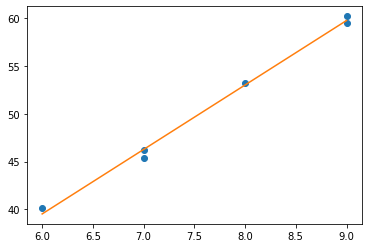

In [57]:
plt.plot(df.Xi, df.Yi, 'o')
b1, b0 = np.polyfit(df.Xi, df.Yi, 1)
print(f"b0 = {b0}, b1 = {b1}")
plt.plot(df.Xi, b0 + b1*df.Xi)


Проверим гипотезу о значимости коэффициента корреляции на уровне значимости $\alpha=0.05$.

$H_0: r=0$, то есть между переменными x и y отсутствует линейная взаимосвязь в генеральной совокупности;

$H_1: r\neq0$, то есть между переменными x и y есть линейная взаимосвязь в генеральной совокупности.

Вычислим статистику критерия:
$$ t_{расч} = r_{xy}\sqrt{\frac{n-k-1}{1-r^2_{xy}}} $$
, где k - число факторов в модели
$$ t_{наб} = r_B\frac{\sqrt{n-2}}{\sqrt{1-r^2_B}} $$


In [67]:
rB * (n - 2)**0.5 / (1 - rB**2)**0.5


2.9947740821849433

$ t_{наб} = 2,995 $

По уровню значимости $\alpha=0,05$ и числу степеней свободы $k=n-2=6-2=4$ находим двухстороннюю критическую область.


In [66]:
sts.t.ppf(1-0.05/2, n-2)


2.7764451051977987

$t_{кр}=2,776$

Так как $|t_{наб}| >t_{кр}$ , то гипотезу о равенстве нулю коэффициента корреляции отвергаем, т.е. считаем, что $r\neq0$.

Найдем, коэффициент детерминации $R^2 = r^2_B$.


In [68]:
rB**2


0.6915644053098841

$R^2 = 0,69 $

Так как $R^2<0,75$ (0,75 - шаблонное значение), то уравнением регрессии пользоваться не рекомендуется.
В дальнейшем, т.к. зависимость между X и Y существует ($r\neq0$), следует
либо изменить вид зависимости, либо увеличить число наблюдений и провести
анализ зависимости снова.
